In [5]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('wine.data' , header=None)
X = df.iloc[:,1:14].values
y = df.iloc[:,0].values
df.columns=['Classlabel', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinityofash', 'Magnesium', 
'Totalphenols', 'Flavanoids', 'Nonflavanoidphenols', 'Proanthocyanins', 'Colorintensity', 'Hue', 'ofdilutedwines', 'Proline']

X_train, X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state=0 , stratify = y)

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Colorintensity                 0.143920
 4) ofdilutedwines                 0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Totalphenols                   0.050872
 8) Magnesium                      0.031357
 9) Malicacid                      0.025648
10) Proanthocyanins                0.025570
11) Alcalinityofash                0.022366
12) Nonflavanoidphenols            0.013354
13) Ash                            0.013279


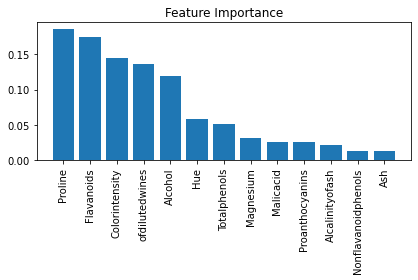

In [6]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
feat_labels = df.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit ( X_train , y_train )
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range( X_train.shape [1]): 
    print("%2d) %-*s %f" % (f+1 , 30 , feat_labels[indices[f]], importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape [1]) , importances[indices], align ='center')
plt.xticks(range(X_train.shape [1]) , feat_labels[indices] , rotation =90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [7]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest , threshold= 0.1 , prefit = True)
X_Selected = sfm.transform(X_train)
## print('Number of samples that eet this criterion: ' , X_Selected.shape[0])


In [8]:
for f in range(X_Selected.shape[1]):
    print("%2d) %-*s %f" % (f+1 , 30 , feat_labels[indices[f]], importances[indices[f]]))
    

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Colorintensity                 0.143920
 4) ofdilutedwines                 0.136162
 5) Alcohol                        0.118529
